# Statistics and analysis of cross section deployments using matrix profiles.

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

%matplotlib notebook
%matplotlib inline
plt.rcParams.update({'font.size': 17})

def cross_section_stats(hit_list,name):
    #hit list: list of detected steps
    hit_list = np.array(hit_list)
    std = np.around(np.std(hit_list),2)
    mean = np.mean(hit_list)
    print("Cross section: ", name)
    print("Mean steps: ", mean)
    print('Number of deployments:', len(hit_list))
    print('Std: ', std, "\n")

# Query search stats

In [97]:


#A5   
A5_hits =  np.array([2,2,3,4,3,3,4,4,2])
A6_hits =  np.array([6,7,5,8,7,1,2,5])
A7_hits =  np.array([12,8,6,9,11,8,9,6,8])
A8_hits =  np.array([10,9,8,11,12,8,12,16,14,6])
A9_hits =  np.array([9,12,14,13,22,22,13,15,14,12])
A10_hits = np.array([23,26,17,17,26,26,23,26,19])
A11_hits = np.array([21,26,27,18,27,23])
A12_hits = np.array([24,29,30,28,25,25,25,24,25])
A13_hits = np.array([43,25,33,29,36,33,40])
A14_hits = np.array([45,41,46,43,43,43,43])
A15_hits = np.array([51,52,51,48,55,58])
A16_hits = np.array([58,84,59,70,66,55])
A17_hits = np.array([70,69,74])
A18_hits = np.array([85,115,77,67,90,65,73,66])
A20_hits = np.array([105,112,98,85,113,98])
A25_hits = np.array([145,148,134,137])

all_cs_q = [A5_hits ,A6_hits ,A7_hits ,A8_hits ,A9_hits ,A10_hits,A11_hits,A12_hits,A13_hits,A14_hits,A15_hits,A16_hits,A17_hits,A18_hits,A20_hits,A25_hits]

cross_section_stats(A5_hits,"A5")
cross_section_stats(A6_hits,"A6")
cross_section_stats(A7_hits,"A7")
cross_section_stats(A8_hits,"A8")
cross_section_stats(A9_hits,"A9")
cross_section_stats(A10_hits,"A10")
cross_section_stats(A11_hits,"A11")
cross_section_stats(A12_hits,"A12")
cross_section_stats(A13_hits,"A13")
cross_section_stats(A14_hits,"A14")
cross_section_stats(A15_hits,"A15")
cross_section_stats(A16_hits,"A16")
cross_section_stats(A17_hits,"A17")
cross_section_stats(A18_hits,"A18")
cross_section_stats(A20_hits,"A20")
cross_section_stats(A25_hits,"A25")

#error for deployment and total
n_detected_steps = np.array([3.0,5.1,8.6,10.6,14.6,22.6,23.7,26.1,35.6,43.5,52.5,65.3,71,79.8,101.8,141])
n_true_steps = np.array([4,7,9,11,14,19,24,30,35,54,66,77,89,95,109,155])

#Mean Absolute Percentage Error
MAPE = 0
Step_miscount = 0
for i in range(len(n_true_steps)):
    Err_step_n = abs(n_true_steps[i]-n_detected_steps[i])
    #print("Difference: ",Err_step_n)
    Err_p = abs((n_true_steps[i]-n_detected_steps[i])/n_true_steps[i])#percent error of each deployment
    print("median:",np.median(all_cs_q[i]))
    #print(np.around(Err_p,2))
    MAPE += Err_p
    Step_miscount += Err_step_n

MAPE = np.around(MAPE/len(n_true_steps),2)
avg_step_miscount = Step_miscount/len(n_true_steps)
tot_step_miscount = abs(np.sum(n_true_steps) - np.sum(n_detected_steps))

count_error = abs((np.sum(n_true_steps)-np.sum(n_detected_steps))/np.sum(n_true_steps))

print("Mean Absolute Percentage Error: ",MAPE)
print("Mean step miscount: ", avg_step_miscount)
print("Total miscount: ",tot_step_miscount)
print("Total detected steps: ", np.sum(n_detected_steps))
print("Total true steps: ", np.sum(n_true_steps))
print("Aggregate count error: ", count_error)



true_hits_B14 = [4,9,19,30]
B14_hits = [2,12,23,29]

true_hits_B13 = [7,11,14,30,77,99]
B13_hits = [6,9,12,24,58,105]

true_hits_B56 = [4,9,19,24,54]
B56_hits = [3,6,17,26,45]

true_hits_B17 = [4,9,14,30,85]
B17_hits = [2,8,14,30,115]

true_hits_B82 = [4,9,19,24,54,89]
B82_hits = [4,6,26,27,43,74]




Cross section:  A5
Mean steps:  3.0
Number of deployments: 9
Std:  0.82 

Cross section:  A6
Mean steps:  5.125
Number of deployments: 8
Std:  2.32 

Cross section:  A7
Mean steps:  8.555555555555555
Number of deployments: 9
Std:  1.89 

Cross section:  A8
Mean steps:  10.6
Number of deployments: 10
Std:  2.87 

Cross section:  A9
Mean steps:  14.6
Number of deployments: 10
Std:  4.0 

Cross section:  A10
Mean steps:  22.555555555555557
Number of deployments: 9
Std:  3.69 

Cross section:  A11
Mean steps:  23.666666666666668
Number of deployments: 6
Std:  3.35 

Cross section:  A12
Mean steps:  26.11111111111111
Number of deployments: 9
Std:  2.13 

Cross section:  A13
Mean steps:  34.142857142857146
Number of deployments: 7
Std:  5.72 

Cross section:  A14
Mean steps:  43.42857142857143
Number of deployments: 7
Std:  1.5 

Cross section:  A15
Mean steps:  52.5
Number of deployments: 6
Std:  3.2 

Cross section:  A16
Mean steps:  65.33333333333333
Number of deployments: 6
Std:  9.76 



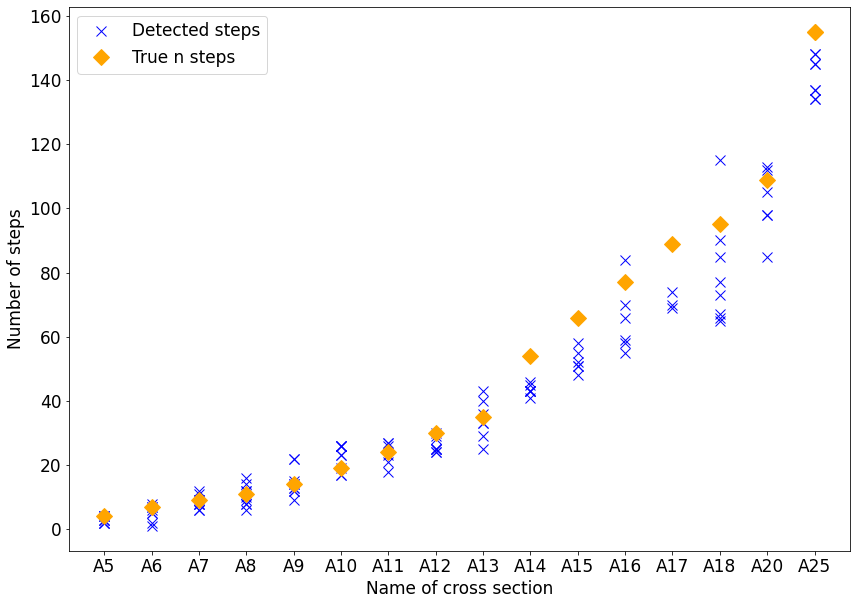

In [98]:
"""Plot cross section hits by cross section"""
def plot_cs_hits(file_list):
    x_labels = ["A5","A6","A7",'A8','A9','A10','A11','A12','A13','A14','A15','A16','A17','A18','A20','A25']
    x_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
    fig, ax = plt.subplots(figsize = (14,10))
    for i in range(len(file_list)):
        x_arr = np.ones(len(file_list[i]))*x_vals[i]
        ax.plot(x_arr,file_list[i],ls = 'None',marker = 'x',markersize = 10,c='blue')
        ax.plot(x_vals[i],n_true_steps[i], ls = "None",marker = 'D',c = 'orange',markersize = 12)
        
    ax.plot(x_arr,file_list[i],ls = 'None',marker = 'x',markersize = 10,c='blue',label = 'Detected steps')
    ax.plot(x_vals[i],n_true_steps[i], ls = "None",marker = 'D',c = 'orange',markersize = 12,label = 'True n steps')
    ax.set_xticks(x_vals,x_labels)
    ax.set_xlabel('Name of cross section')
    ax.set_ylabel('Number of steps')
    plt.legend()

plot_cs_hits(all_cs_q)

# Iterative mp stats 

sigma:  1.63
sigma:  1.11
sigma:  1.83
sigma:  3.71
sigma:  1.66
sigma:  3.77
sigma:  2.13
sigma:  5.0
sigma:  3.15
sigma:  6.47
sigma:  6.2
sigma:  3.99
sigma:  6.6
sigma:  11.31
sigma:  10.73
sigma:  7.73
Mean Absolute Percentage Error:  0.17
Mean step miscount:  4.430084325396825
Total miscount:  3.3805555555554747
Total detected steps:  794.6194444444445
Total true steps:  798
Aggregate count error:  0.004236285157337687


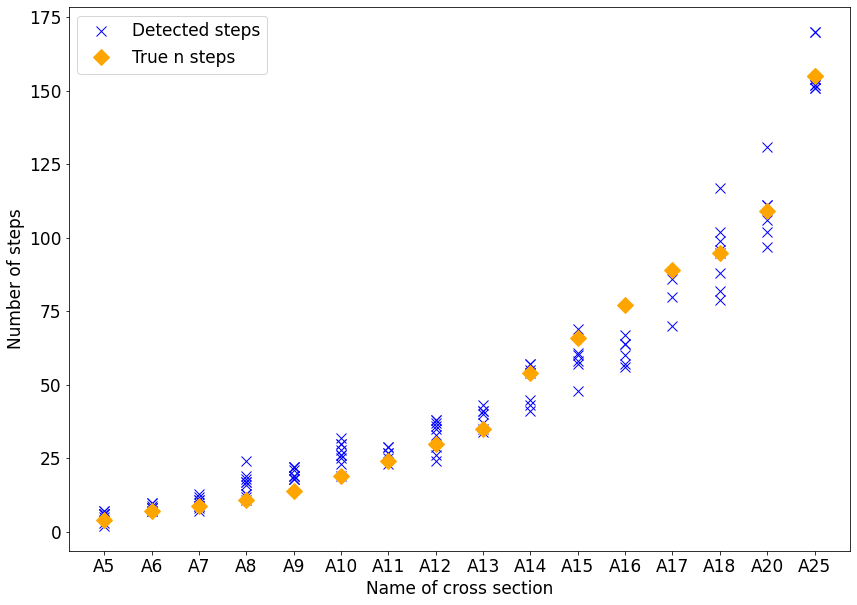

In [99]:
A5_i_hits =  [5,2,3,6,6,7,6,6,7]
A6_i_hits =  [8,8,9,7,7,10,8,10]
A7_i_hits =  [7,8,13,11,9,10,9,11,12]
A8_i_hits =  [24,17,11,13,18,12,17,16,13,19]
A9_i_hits =  [18,21,19,19,22,18,18,19,22,22]
A10_i_hits = [19,26,25,32,30,28,23,26,30]
A11_i_hits = [29, 25, 29, 23, 27, 27]
A12_i_hits = [24,36,33,38,26,38,29,35,37]
A13_i_hits = [41,35,34,41,40,37,43]
A14_i_hits = [54,43,55,45,57,41,57]
A15_i_hits = [69,48,61,60,57,58]
A16_i_hits = [64,56,60,67,57,64]
A17_i_hits = [80,86,70]
A18_i_hits = [82,117,102,96,88,99,95,79]
A20_i_hits = [97,111,111,102,131,106]
A25_i_hits = [151,154,170,152]

all_cs_i = [A5_i_hits ,A6_i_hits ,A7_i_hits ,A8_i_hits ,A9_i_hits ,A10_i_hits,A11_i_hits,A12_i_hits,A13_i_hits,A14_i_hits,A15_i_hits,A16_i_hits,A17_i_hits,A18_i_hits,A20_i_hits,A25_i_hits]


n_detected_steps_i = [5.333333333333333,8.375,10.0,16,19.8,26.555555555555557,26.666666666666668,32.888888888888886,38.714285714285715,50.285714285714285,58.833333333333336,61.333333333333336,78.66666666666667,94.75,109.66666666666667,156.75]


#Mean Absolute Percentage Error
MAPE_i = 0
Step_miscount_i = 0
for i in range(len(n_true_steps)):
    Err_step_n = abs(n_true_steps[i]-n_detected_steps_i[i])
    #print("Difference: ",Err_step_n)
    Err_p = abs((n_true_steps[i]-n_detected_steps_i[i])/n_true_steps[i])#percent error of each deployment
    #print(np.around(Err_p,2))
    #print("median step count: ", np.median(all_cs_i[i]))
    print("sigma: ", np.around(np.std(all_cs_i[i]),2))
    
    MAPE_i += Err_p
    Step_miscount_i += Err_step_n

MAPE_i = np.around(MAPE_i/len(n_true_steps),2)
avg_step_miscount_i = Step_miscount_i/len(n_true_steps)
tot_step_miscount_i = abs(np.sum(n_true_steps) - np.sum(n_detected_steps_i))

count_error_i = abs((np.sum(n_true_steps)-np.sum(n_detected_steps_i))/np.sum(n_true_steps))

print("Mean Absolute Percentage Error: ",MAPE_i)
print("Mean step miscount: ", avg_step_miscount_i)
print("Total miscount: ",tot_step_miscount_i)
print("Total detected steps: ", np.sum(n_detected_steps_i))
print("Total true steps: ", np.sum(n_true_steps))
print("Aggregate count error: ", count_error_i)

plot_cs_hits(all_cs_i)

In [100]:
n_detected_steps = [A5_mean,A6_mean,A7_mean,A8_mean,A9_mean,A10_mean,A11_mean,A12_mean,A13_mean,A14_mean,A15_mean,A16_mean,A17_mean,A18_mean,A20_mean]

#Mean Absolute Percentage Error
MAPE = 0
Step_miscount = 0
tune_th = 0
for i in range(len(n_true_steps)):
    Err_step_n = (n_true_steps[i]-n_detected_steps[i])
    print("Difference: ",Err_step_n)
    Err_p = abs((n_true_steps[i]-n_detected_steps[i])/n_true_steps[i])#percent error of each deployment
    print(np.around(Err_p,2))
    MAPE += Err_p
    Step_miscount += abs(Err_step_n)
    tune_th += Err_step_n

MAPE = np.around(MAPE/len(n_true_steps),2)
avg_step_miscount = Step_miscount/len(n_true_steps)
print("Mean Absolute Percentage Error: ",MAPE)
print("Mean step miscount: ", avg_step_miscount)
print("Threshold too high/low: ", tune_th)
print("Total miscount: ", Step_miscount)

NameError: name 'A5_mean' is not defined

In [101]:
"""Compare discharge estimates"""
Q_1608 = [0.317592,0.59018,0.381752,0.3198312,0.334324,0.4175388,0.29939]
mean_Q_1608 = np.mean(Q_1608)

V_1608 = [2.005,2.566,2.005,1.608,1.66,2.367,3.29]
mean_V_1608 = np.mean(V_1608)
print("Mean discharge 1608: ", mean_Q_1608)
print("Mean velocity 1608:", mean_V_1608)

Q_1808 = [0.37152,0.664490909,0.5091296,0.3689595,0.346774182,0.356969455,0.282175833]
mean_Q_1808 = np.mean(Q_1808)

V_1808 = [2.345454545,2.889090909,2.674,1.855,1.721818182,2.023636364,3.100833333]
mean_V_1808 = np.mean(V_1808)
print("Mean discharge 1808: ", mean_Q_1808)
print("Mean velocity 1808: ", mean_V_1808 )

Mean discharge 1608:  0.3800868571428571
Mean velocity 1608: 2.214428571428571
Mean discharge 1808:  0.414288497
Mean velocity 1808:  2.3728333332857146


# Is the step count a function of dataset length?

0.16663047377911167


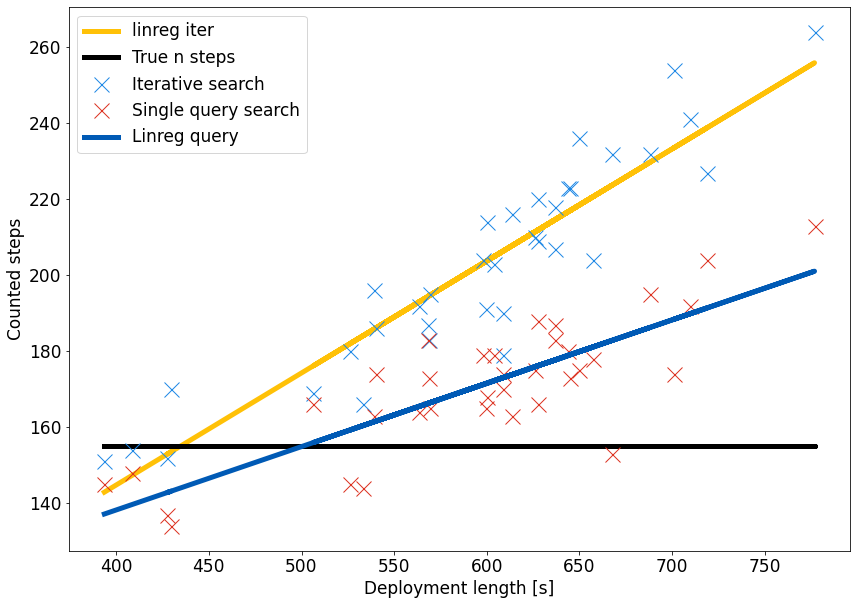

In [102]:
def remove_trend(dlen,man):
    return 0
tot_steps_i = []
tot_steps_q = []
tot_dlen = []

A25_1808_steps_q = [145,148,134,137]
A25_1808_steps_i = [151,154,170,152]
A25_1808_dlen =  np.array([39357,40851,42956,42756])#data length
tot_steps_i.extend(A25_1808_steps_i)
tot_steps_q.extend(A25_1808_steps_q)
tot_dlen.extend(A25_1808_dlen)

 

A25_1708_steps_q = [173,183,187,174,168,153,180,163,173,165,183,179,195]
A25_1708_steps_i = [183,187,207,190,214,232,223,216,223,195,218,203,232]
A25_1708_dlen =  np.array([56863,56832,63684,60900,60002,66773,64389,61376,64492,56932,63665,60370,68808])#data length
tot_steps_i.extend(A25_1708_steps_i)
tot_steps_q.extend(A25_1708_steps_q)
tot_dlen.extend(A25_1708_dlen)


A25_1608_steps_q = [175,179,166,175,188,213,174,204,192]
A25_1608_steps_i = [210,204,220,236,209,264,254,227,241]
A25_1608_dlen = np.array([62579,59770,62778,64959,62779,77691,70088,71906,70970])
tot_steps_i.extend(A25_1608_steps_i)
tot_steps_q.extend(A25_1608_steps_q)
tot_dlen.extend(A25_1608_dlen)

A25_1508_steps_q = [166,144,170,145,165,178,174,163,164]
A25_1508_steps_i = [169,166,179,180,191,204,186,196,192]
A25_1508_dlen = np.array([50637,53339,60863,52620,59941,65752,54012,53935,56349])
tot_steps_i.extend(A25_1508_steps_i)
tot_steps_q.extend(A25_1508_steps_q)
tot_dlen.extend(A25_1508_dlen)

#make a linear regression of all points

tot_dlen = np.array(tot_dlen)/100
slope_q, intercept_q, r, p, se = stats.linregress(tot_dlen, tot_steps_q)
slope_i, intercept_i, r, p, se = stats.linregress(tot_dlen, tot_steps_i)
t = tot_dlen - np.min(tot_dlen)#
linreg_q = slope_q*tot_dlen +intercept_q
linreg_i = slope_i*tot_dlen + intercept_i

print(slope_q)
#remove trend
tot_steps_i = np.array(tot_steps_i)# - slope_i*tot_dlen#linreg_i
tot_steps_q = np.array(tot_steps_q)#linreg_q

true_steps = np.ones(len(t))*155


fig, ax = plt.subplots(figsize = (14,10))
#ax.plot(A25_1708_dlen/100,A25_1708_steps_q,ls = "None", marker = "o")
#ax.plot(A25_1708_dlen/100,A25_1708_steps_i,ls = "None", marker = "o")
ax.plot(tot_dlen,linreg_i,label = "linreg iter",c = '#FFC107',linewidth = 5)
ax.plot(tot_dlen,true_steps, label = 'True n steps',c = 'black',linewidth = 5)
ax.plot(tot_dlen,tot_steps_i,label = 'Iterative search',ls = "None", marker = 'x',c = '#1E88E5',markersize = '15',linewidth = 10)

ax.plot(tot_dlen,tot_steps_q,label = 'Single query search',ls='None',marker = "x",c = '#DC3220',markersize = 15)
ax.plot(tot_dlen,linreg_q,label = "Linreg query",c='#005AB5',linewidth=5)

ax.set_ylabel("Counted steps")
ax.set_xlabel("Deployment length [s]")
plt.legend()
plt.show()

# approximate velocity to make a scaling factor

In [103]:
c_length = 575#corr factor 260
c_length = 545#corr factor 290
c_length = 1080

#use the 1808 as reference velocity since all data is tuned to this velocity
t0 = np.mean(A25_1808_dlen)/100
v0 = c_length/t0
print(v0)

#calculate velocity on other days
v17 = c_length/(A25_1708_dlen/100)
v17_diff = v17-v0 
v16 = c_length/(A25_1608_dlen/100)
v16_diff = v16-v0
v15 = c_length/(A25_1508_dlen/100)
v15_diff = v15-v0


v_diff = []
v_diff.extend(v17_diff)
v_diff.extend(v16_diff)
v_diff.extend(v15_diff)
v_diff = np.array(v_diff)

#remove trend using velocity difference
def correct_for_velocity(v_d,n_steps,corr_factor = 260):
    steps_dtrend = np.array(n_steps) + (v_d/(abs(v_d))*v_d**2*corr_factor)
    print("mean detrended ",np.mean(steps_dtrend))
    return steps_dtrend
    
corr_fac_i = 73.5
corr_fac_q = 36

#method 2 remove trend by using the quadratic of the velocity to create larger penalties for slower of faster deps
tot_steps_i_dtrend = correct_for_velocity(v_diff,tot_steps_i,corr_fac_i)#np.array(tot_steps_i) + (v_diff/(abs(v_diff))*v_diff**2*260)#linreg_i
tot_steps_q_dtrend = correct_for_velocity(v_diff,tot_steps_q,corr_fac_q)#np.array(tot_steps_i) + (v_diff/(abs(v_diff))*v_diff**2*260)#linreg_i

#detrend days
print("\n####17.08 detrended####")
print("query")
steps_1708_detrend_q = correct_for_velocity(v17_diff,A25_1708_steps_q,corr_fac_q)
print("iterate")
steps_1708_detrend_i = correct_for_velocity(v17_diff,A25_1708_steps_i,corr_fac_i)

print("\n####16.08 detrended####")
print("query")
steps_1608_detrend_q = correct_for_velocity(v16_diff,A25_1608_steps_q,corr_fac_q)
print("iterate")
steps_1608_detrend_i = correct_for_velocity(v16_diff,A25_1608_steps_i,corr_fac_i)

print("\n####15.08 detrended####")
print("query")
steps_1508_detrend_q = correct_for_velocity(v15_diff,A25_1508_steps_q,corr_fac_q)
print("iterate")
steps_1508_detrend_i = correct_for_velocity(v15_diff,A25_1508_steps_i,corr_fac_i)
 

slope_i, intercept_i, r, p, se = stats.linregress(tot_dlen, tot_steps_i_dtrend)
slope_q, intercept_q, r, p, se = stats.linregress(tot_dlen, tot_steps_q_dtrend)



linreg_q_dtrend = slope_q*tot_dlen +intercept_q
linreg_i_dtrend = slope_i*tot_dlen + intercept_i

t = tot_dlen - np.min(tot_dlen)#
true_steps = np.ones(len(t))*155

fig, (ax1,ax2) = plt.subplots(figsize = (14,10),nrows=2)
ax1.plot(tot_dlen,linreg_i,label = "linreg iter",c = '#FFC107',linewidth = 5)
ax1.plot(tot_dlen,true_steps, label = 'True n steps',c = 'black',linewidth = 5)
ax1.plot(tot_dlen,tot_steps_i,label = 'n detected steps',ls = "None", marker = 'x',c = '#1E88E5',markersize = '15',linewidth = 10)


ax2.plot(tot_dlen,true_steps, label = 'True n steps',c = 'black',linewidth = 7)
ax2.plot(tot_dlen,linreg_i_dtrend,label = "linreg iter corrected",c = '#FFC107',linewidth = 5)
ax2.plot(tot_dlen,tot_steps_i_dtrend,label = 'n detected steps corrected',ls = "None", marker = 'x',c = '#1E88E5',markersize = 15)
#ax.plot(tot_dlen,tot_steps_q,label = 'Single query search',ls='None',marker = "o",c = 'r')



ax1.set_ylim(120,270)
ax2.set_ylim(120,270)

ax1.set_ylabel("Counted steps")
ax2.set_xlabel("Deployment time [s]")
ax2.set_ylabel("Counted steps")
ax1.legend()
ax2.legend()
plt.show()




fig2, (ax3,ax4) = plt.subplots(figsize = (14,10),nrows=2)
ax3.plot(tot_dlen,linreg_q,label = "linreg query",c = '#005AB5',linewidth = 5)
ax3.plot(tot_dlen,true_steps, label = 'True n steps',c = 'black',linewidth = 5)
ax3.plot(tot_dlen,tot_steps_q,label = 'n detected steps',ls = "None", marker = 'x',c = '#DC3220',markersize = '15',linewidth = 10)

ax4.plot(tot_dlen,true_steps, label = 'True n steps',c = 'black',linewidth = 7)
ax4.plot(tot_dlen,linreg_q_dtrend,label = "linreg query corrected",c = '#005AB5',linewidth = 5)
ax4.plot(tot_dlen,tot_steps_q_dtrend,label = 'n detected steps corrected',ls = "None", marker = 'x',c = '#DC3220',markersize = 15)
#ax.plot(tot_dlen,tot_steps_q,label = 'Single query search',ls='None',marker = "o",c = 'r')

ax3.set_ylim(110,270)
ax4.set_ylim(110,270)

ax3.set_ylabel("Counted steps")
ax4.set_xlabel("Deployment time [s]")
ax4.set_ylabel("Counted steps")
ax3.legend()
ax4.legend()
plt.show()

2.6036644165863065


ValueError: operands could not be broadcast together with shapes (35,) (31,) 

# Apply velocity correction to 18082020 data

mean detrended  157.22391740869602


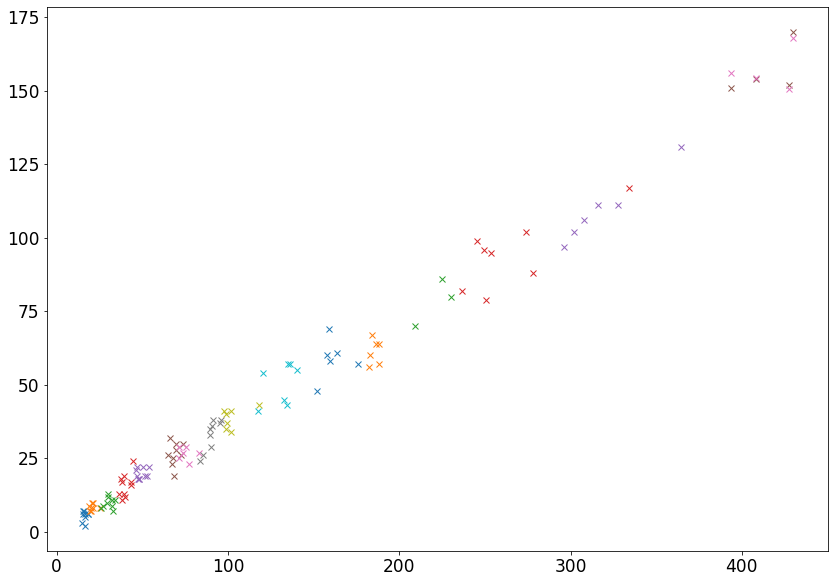

In [104]:



A5_dlen_1808 =  np.array([1665,1630,1495,1650,1798,1522,1517,1802,1596])
A6_dlen_1808 =  np.array([2537,2115,1885,1961,1994,2059,2008,2137])
A7_dlen_1808 =  np.array([3289,2605,3014,3209,2717,2920,3209,3388,2972])
A8_dlen_1808 =  np.array([4440,3828,3793,3631,3732,3990,4322,4307,3922,3911])
A9_dlen_1808 =  np.array([4821,4637,5243,4715,5412,4813,4730,5139,4667,5032])
A10_dlen_1808 = np.array([6875,7258,6787,6625,6992,6950,6758,6485,7390])
A11_dlen_1808 = np.array([7120,7150,7573,7735,7368,8300])
A12_dlen_1808 = np.array([8366,9040,8940,9150,8520,9617,9000,8960,9533])
A13_dlen_1808 = np.array([9753,9877,10147,10184,9857,9963,11838])
A14_dlen_1808 = np.array([12050,13450,14000,13250,13500,11735,13600])
A15_dlen_1808 = np.array([15872,15195,16372,15763,17582,15969])
A16_dlen_1808 = np.array([18631,18221,18302,18417,18802,18826])
A17_dlen_1808 = np.array([23041,22490,20897])
A18_dlen_1808 = np.array([23636,33401,27393,24934,27831,24563,25334,25053])
A20_dlen_1808 = np.array([29600,32769,31603,30179,36465,30784])
A25_dlen_1808 = np.array([39357,40851,42956,42756])

fig,ax = plt.subplots(figsize = (14,10))

ax.plot(A5_dlen_1808 /100, A5_i_hits,ls = "None", marker = "x")
ax.plot(A6_dlen_1808 /100, A6_i_hits,ls = "None", marker = "x") 
ax.plot(A7_dlen_1808 /100, A7_i_hits,ls = "None", marker = "x") 
ax.plot(A8_dlen_1808 /100, A8_i_hits,ls = "None", marker = "x") 
ax.plot(A9_dlen_1808 /100, A9_i_hits,ls = "None", marker = "x") 
ax.plot(A10_dlen_1808/100,A10_i_hits,ls = "None", marker = "x")
ax.plot(A11_dlen_1808/100,A11_i_hits,ls = "None", marker = "x")
ax.plot(A12_dlen_1808/100,A12_i_hits,ls = "None", marker = "x")
ax.plot(A13_dlen_1808/100,A13_i_hits,ls = "None", marker = "x")
ax.plot(A14_dlen_1808/100,A14_i_hits,ls = "None", marker = "x")
ax.plot(A15_dlen_1808/100,A15_i_hits,ls = "None", marker = "x")
ax.plot(A16_dlen_1808/100,A16_i_hits,ls = "None", marker = "x")
ax.plot(A17_dlen_1808/100,A17_i_hits,ls = "None", marker = "x")
ax.plot(A18_dlen_1808/100,A18_i_hits,ls = "None", marker = "x")
ax.plot(A20_dlen_1808/100,A20_i_hits,ls = "None", marker = "x")
ax.plot(A25_dlen_1808/100,A25_i_hits,ls = "None", marker = "x")

#calculate velocity on other days
v18_A25 = c_length/(A25_dlen_1808/100)

v18_A25_diff = v18_A25-v0

#method 2 remove trend by using the quadratic of the velocity to create larger penalties for slower of faster deps
A25_1808_steps_i_dtrend = correct_for_velocity(v18_A25_diff,A25_i_hits,260)#np.array(tot_steps_i) + (v_diff/(abs(v_diff))*v_diff**2*260)#linreg_i

ax.plot(A25_dlen_1808/100,A25_1808_steps_i_dtrend,ls = "None", marker = "x")

# Apply scaling factor to kongsvegen data

In [105]:
Step_count_kongs_i =  np.array([117, 126, 144, 138, 126, 136, 137, 144])
Step_count_kongs_q = np.array([127,115,107,124,122,110,140,135])

kongsvegen_dlen = np.array([31217,34812,36296,35254,36094,33402,39810,40939])
c_len_kongs = 652

v_kongsvegen = c_len_kongs/(kongsvegen_dlen/100)
v_kongsvegen_diff = v_kongsvegen-v0

kongsvegen_steps_i_dtrend = correct_for_velocity(v_kongsvegen_diff,Step_count_kongs_i,corr_fac_i)#np.array(tot_steps_i) + (v_diff/(abs(v_diff))*v_diff**2*260)#linreg_i
kongsvegen_steps_q_dtrend = correct_for_velocity(v_kongsvegen_diff,Step_count_kongs_q,corr_fac_q)#np.array(tot_steps_i) + (v_diff/(abs(v_diff))*v_diff**2*260)#linreg_i


print(np.mean(Step_count_kongs_i))
print(np.mean(Step_count_kongs_q))

mean detrended  87.23726059384835
mean detrended  99.8406990663747
133.5
122.5


# Apply scaling factor to M-series Kongsvegen data

iterative step count:  89.0
mean detrended  27.26781291167424
single query step count:  186.33333333333334
mean detrended  156.09716006558196
[47.18038091 33.48474034  6.43558616 23.26046276 32.15470435 21.09100295]

15.07.2020
iterative step count:  170.0
mean detrended  108.37866705510939
single query step count:  186.33333333333334
mean detrended  147.2625670836817


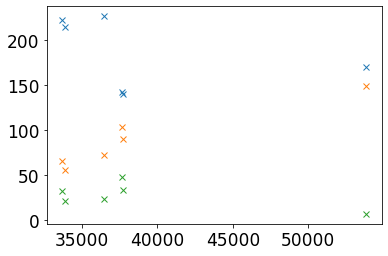

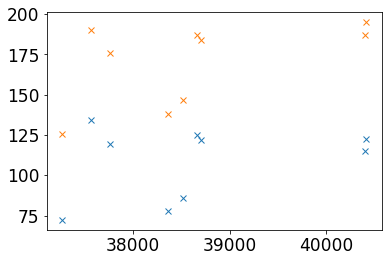

In [109]:


step_count_1307_kongs_q = np.array([143,140,170,227,223,215])
step_count_1307_kongs_i = np.array([103,90, 149, 72, 65, 55])
#step_count_1307_kongs_i = np.array([173,161,256,131,117,103])


kongs_13_m_dlen = np.array([37640,37758,53842,36438,33692,33880])

v_kongsvegen = c_len_kongs/(kongs_13_m_dlen/100)
v_kongsvegen_diff = v_kongsvegen-v0

print("iterative step count: ",np.mean(step_count_1307_kongs_i))
step_kongs_corr_i = correct_for_velocity(v_kongsvegen_diff,step_count_1307_kongs_i,corr_fac_i)

print("single query step count: ",np.mean(step_count_1307_kongs_q))
step_kongs_corr_q = correct_for_velocity(v_kongsvegen_diff,step_count_1307_kongs_q,corr_fac_q)

fig, ax = plt.subplots()
ax.plot(kongs_13_m_dlen,step_count_1307_kongs_q,ls='None',marker = 'x')
ax.plot(kongs_13_m_dlen,step_count_1307_kongs_i,ls='None',marker = 'x')
ax.plot(kongs_13_m_dlen,step_kongs_corr_i,ls='None',marker = 'x')

print(step_kongs_corr_i)


print('\n15.07.2020')

Single_query_steps_15 = np.array([151,147,146,151,152,148,234,233,235])
Iterative_query_steps_15 = np.array([113,109,115,114,113,115,79,76,73])
Iterative_query_steps_15 = np.array([187,176,184,190,195,187,147,126,138])
kongs_dlen_15 = np.array([40408,37760,38700,37560,40420,38660,38520,37260,38360])

v_kongsvegen = c_len_kongs/(kongs_dlen_15/100)
v_kongsvegen_diff = v_kongsvegen-v0

print("iterative step count: ",np.mean(Iterative_query_steps_15))
Iterative_query_steps_15_corr = correct_for_velocity(v_kongsvegen_diff,Iterative_query_steps_15,corr_fac_i)

print("single query step count: ",np.mean(step_count_1307_kongs_q))
Single_query_steps_15_corr = correct_for_velocity(v_kongsvegen_diff,Single_query_steps_15,corr_fac_q)


fig, ax = plt.subplots()
ax.plot(kongs_dlen_15,Iterative_query_steps_15_corr,ls='None',marker = 'x')
ax.plot(kongs_dlen_15,Iterative_query_steps_15,ls='None',marker = 'x')


A5 4
A6 3
A7 2
A8 2
A9 3
A10 5
A11 5
A12 6
A13 5
A14 19
A15 12
A16 11
A17 12
A18 6
A20 14
A25 46
[4, 3, 2, 2, 3, 5, 5, 6, 5, 19, 12, 11, 12, 6, 14, 46]


ValueError: The number of FixedLocator locations (14), usually from a call to set_ticks, does not match the number of ticklabels (16).

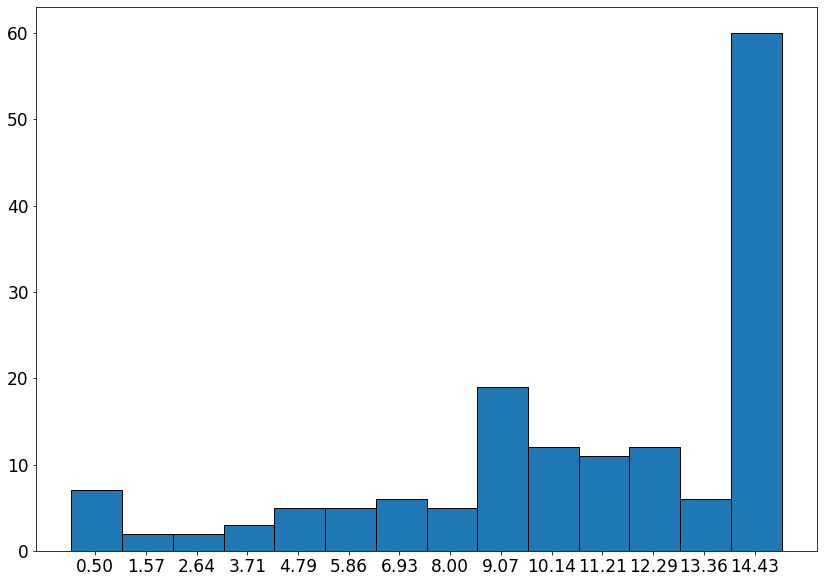

In [107]:
#n_true_steps = np.array([4,7,9,11,14,19,24,30,35,54,66,77,89,95])
x_labels = ["A5","A6","A7",'A8','A9','A10','A11','A12','A13','A14','A15','A16','A17','A18','A20','A25']
steps_per_cs = [4]
print(x_labels[0],4)
c_bin=np.zeros(4)
bins_dat = []
bins_dat.extend(c_bin)
k=1

for i in range(1,len(n_true_steps)):
    print(x_labels[i],n_true_steps[i] - n_true_steps[i-1])
    steps_per_cs.append(n_true_steps[i] - n_true_steps[i-1])
    c_bin = np.ones(n_true_steps[i] - n_true_steps[i-1])*k
    bins_dat.extend(c_bin)
    k+=1 
    
    
print(steps_per_cs)
fig, ax = plt.subplots(figsize=(14,10))

counts, bins, patches = ax.hist(bins_dat,bins = 14,edgecolor='black')
ax.set_xticks(bins[:-1]+0.5,x_labels)
ax.grid(axis = "y")

A15_A13_time = 53.4
A15_A13_steps = 12+19
print("Steps per sec A15 A13:", A15_A13_steps/A15_A13_time)
A10_A7_time = 36.35
A10_A7_steps = 10+3+2
print("Steps per sec A10 A7:", A10_A7_steps/A15_A13_time)



# Connection between discharge and results

2020-08-16 12:46:47


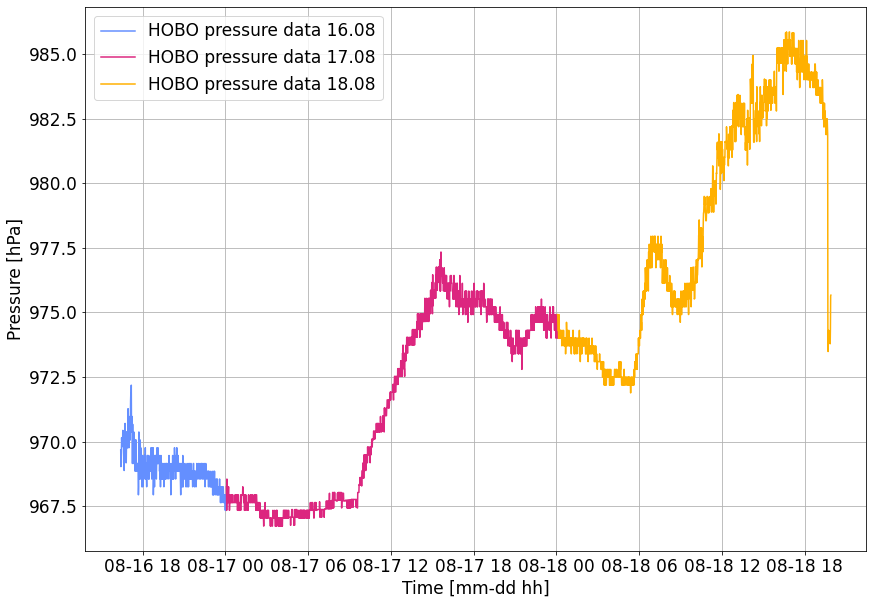

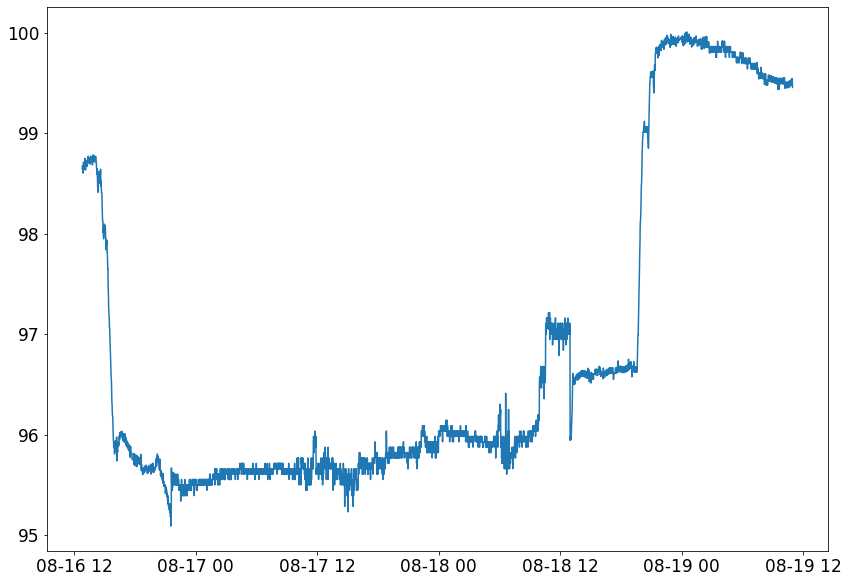

In [95]:
hobo_df1 = pd.read_csv('/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/HOBO_pressure_logger/Austre1.csv',
            header = 1,names = ['index','date_time','pressure'],usecols=[0,1,2])
hobo_df1 = hobo_df1.dropna()
hobo_df1['date_time'] = pd.to_datetime(hobo_df1['date_time'])
#pressure in kPa

print(hobo_df1['date_time'].iloc[2])

fig, ax_hobo = plt.subplots(figsize = (14,10))
ax_hobo.plot(hobo_df1['date_time'].iloc[220:680],hobo_df1['pressure'].iloc[220:680]*10,label="HOBO pressure data 16.08",c = '#648FFF')
ax_hobo.plot(hobo_df1['date_time'].iloc[680:2120],hobo_df1['pressure'].iloc[680:2120]*10,label="HOBO pressure data 17.08",c='#DC267F')
ax_hobo.plot(hobo_df1['date_time'].iloc[2120:-900],hobo_df1['pressure'].iloc[2120:-900]*10,label="HOBO pressure data 18.08",c='#FFB000')



#ax_hobo.set_xticks([1,2,3,4,5,6,7,8,9],['16-18:00','17-00:00','17-06:00','17-12:00','17-18:00','18-00:00','18-06:00','18-12:00','18-18:00'])
ax_hobo.set_xlabel('Time [mm-dd hh]')
ax_hobo.set_ylabel('Pressure [hPa]')
plt.legend()
plt.grid()
plt.show()






hobo_df2 = pd.read_csv('/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/HOBO_pressure_logger/Austre2.csv',
            header = 1,names = ['index','date_time','pressure'],usecols=[0,1,2])
hobo_df2 = hobo_df2.dropna()
hobo_df2['date_time'] = pd.to_datetime(hobo_df2['date_time'])
#pressure in kPa

fig, ax_hobo = plt.subplots(figsize = (14,10))
ax_hobo.plot(hobo_df2['date_time'],hobo_df2['pressure'])
plt.show()

